In this notebook we will carry the trend analysis of technology stocks. 

## Basic plotting

### Candle plot


In [1]:
import yfinance as yfin
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import pandas_datareader.data as pdr

yfin.pdr_override()

# List of stock symbols
tech_stocks = 'AAPL'

# Set the date range for the historical data
start_date = '2023-05-01'
end_date = '2023-08-01'

# Download historical stock data for each stock

stocks = pdr.get_data_yahoo(tech_stocks, start_date, end_date)



[*********************100%%**********************]  1 of 1 completed


In [53]:
kwargs =  dict(type='candle', title =f' Candlestick chart {start_date} to {end_date}',ylabel='Candlestick',figratio=(30,15),figscale=0.75, volume=True)

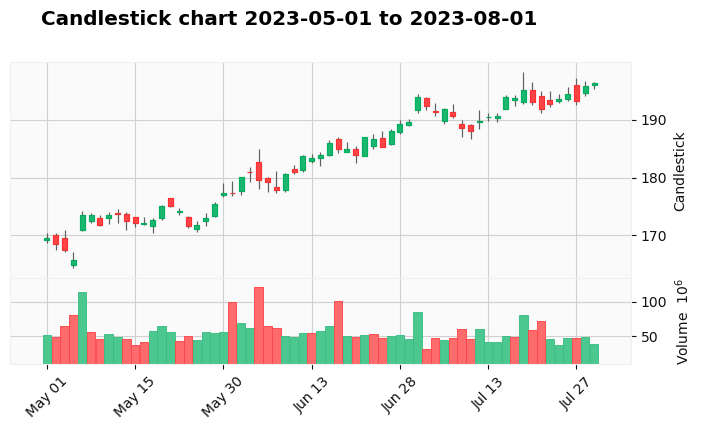

In [55]:
import mplfinance as mpf 

mpf.plot(stocks,**kwargs,style='yahoo')

### OHLC Chart

In [61]:
kwargs =  dict(type='ohlc', title =f' OHLC chart {start_date} to {end_date}',ylabel='OHLC',figratio=(30,15),figscale=0.75, volume=True)

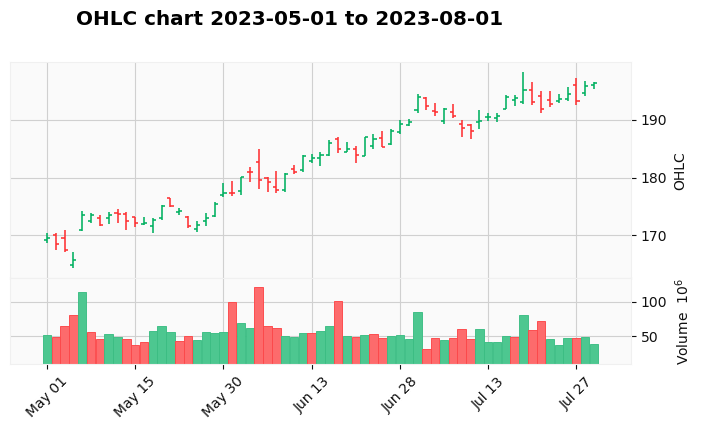

In [62]:
mpf.plot(stocks,**kwargs,style='yahoo')

## Moving average

### Simple moving average

Average over data points in a rolling window. To calculate an SMA the first step is to determine how many periods will be used as the average. The most common peri-
ods are 20, 50, 100 and 200 days. 
For strong movement in the security market, it may be useful to use the 50-day period. If there has not been any change in the companies during of comparison it may be useful to use the 100 or 200-day period.

In [81]:
# Set the date range for the historical data
start_date = '2020-08-01'
end_date = '2023-08-01'

# Download historical stock data for each stock

stocks = pdr.get_data_yahoo(tech_stocks, start_date, end_date)

stocks.dropna(inplace=True)

# Moving average
stocks['50ma'] = stocks['Close'].rolling(50).mean()

stocks['100ma'] = stocks['Close'].rolling(100).mean()

stocks['200ma'] = stocks['Close'].rolling(200).mean()


[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date', ylabel='SMA'>

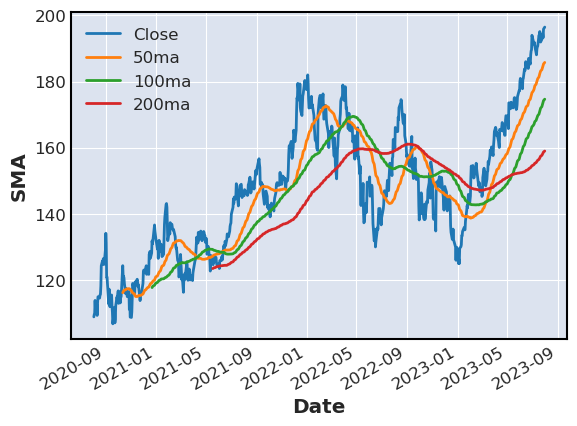

In [90]:
stocks[['Close','50ma','100ma','200ma']].plot(label=['Close','50ma','100ma','200ma'],ylabel='SMA')

### Exponential moving average

In [92]:
stocks['EMA50'] = stocks['Close'].ewm(span=50, adjust=False).mean()

stocks['EMA100'] = stocks['Close'].ewm(span=100, adjust=False).mean()

stocks['EMA200'] = stocks['Close'].ewm(span=200, adjust=False).mean()


<Axes: xlabel='Date', ylabel='EMA'>

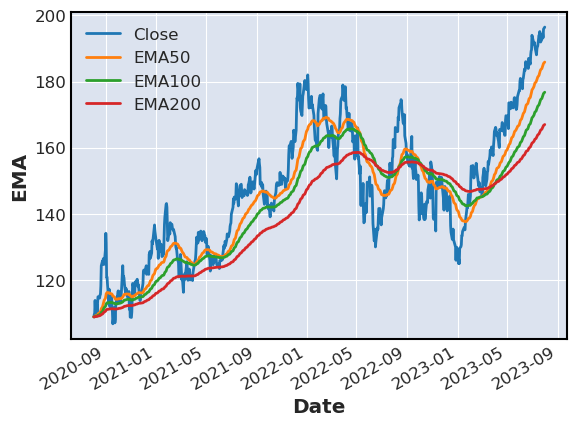

In [93]:
stocks[['Close','EMA50','EMA100','EMA200']].plot(label=['Close','EMA50','EMA100','EMA200'],ylabel='EMA')

## Trend reversal

### MACD

- The MACD line which measures the distance between two moving 
averages.
- Signal line that identifies price change
- Histogram that represents the difference between MACD and signal line.

$MACD = EMA \ for \ 12 \ periods \ − \ EMA \ for \ 26 \ periods$


In [94]:
# MACD for the stock 

stocks['MACD'] = stocks['Close'].ewm(span=12, adjust=False).mean() - stocks['Close'].ewm(span=26, adjust=False).mean()

# baseline for the MACD

stocks['baseline'] = 0


<Axes: xlabel='Date', ylabel='MACD'>

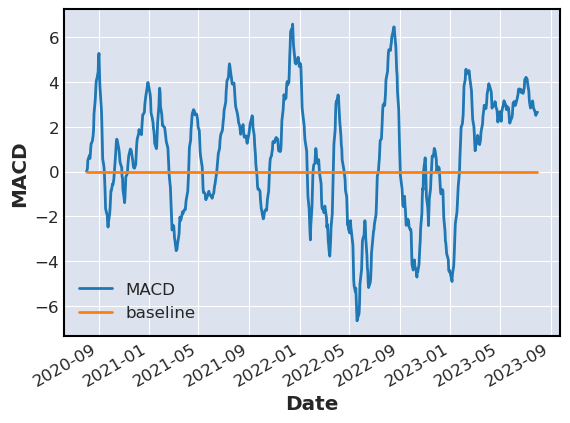

In [95]:
stocks[['MACD','baseline']].plot(label=['MACD','baseline'],ylabel='MACD')

When the MACD is above the baseline then the stock or market is bullish, if the market is below the zero line then the market is bearish.

- When the MACD crosses the signal line from below to above the 
indicator is considered bullish.
- When the MACD crossed the signal line from above to below the indicator is considered bearish.

MACD signal line is equivalent to 9 perdio EMA of MACD

<Axes: xlabel='Date', ylabel='MACD'>

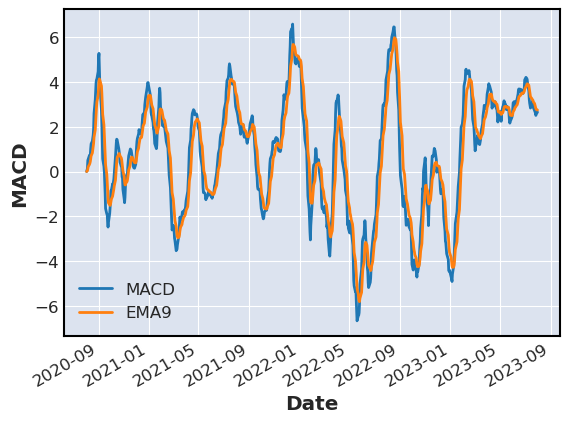

In [102]:
stocks['EMA9'] = stocks['MACD'].ewm(span=9, adjust=False).mean()

stocks[['MACD','EMA9']].plot(label=['MACD','EMA9'],ylabel='MACD')


### Bollinger Bands

 Bollinger bands use moving average and volatility of stocks to give an indication for when the stock is oversold or overbought.

- When price is stable bands are close together. 
- If a price moves beyond the upper barrier the prices are considered 
overbought. 
- If  a  price  moves  below  the  upper  barrier  then  the  prices  are  con-
sidered oversold. 

Rolling standard deviation and average for calculating bands are typically calculated for a period of 20 days.

<Axes: xlabel='Date', ylabel='Bollinger Band'>

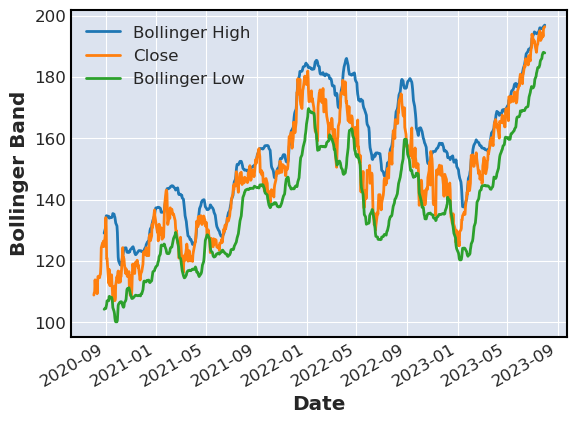

In [105]:
window_of_days = 20
number_std = 2

# calculate the rolling mean and standard deviation
rolling_mean = stocks['Close'].rolling(window_of_days).mean() 
rolling_std = stocks['Close'].rolling(window_of_days).std() 

# calculate the upper and lower bands
stocks['Bollinger High'] = rolling_mean + (rolling_std * number_std) 
stocks['Bollinger Low'] = rolling_mean - (rolling_std * number_std) 

stocks[['Bollinger High','Close','Bollinger Low']].plot(ylabel='Bollinger Band')

## Backtesting

### PSAR strategy

The PSAR strategy, also known as the Parabolic Stop and Reverse strategy, is a technical analysis tool used by traders to identify potential entry and exit points in a trending market. Parabolic SAR (PSAR) is primarily used to trail stop-loss orders and determine the direction of a trend.  The parabolic SAR recommends us to buy if the SAR line is below the closing price and to sell if the SAR is above the closing price. 

Here's an explanation of the PSAR strategy:

Calculation of the Parabolic SAR:

The PSAR is calculated for each period and plotted on a price chart. The calculation involves two primary components: the extreme point (EP) and the acceleration factor (AF).
Initially, the PSAR starts with an arbitrary point as the EP and sets the AF to a predefined value (commonly 0.02).

- As the price moves, the EP is updated based on whether the price reaches new highs or lows.
The AF also increases each time a new EP is established, up to a predetermined maximum (commonly 0.20).
The PSAR value is then calculated using the formula and plotted on the chart.
PSAR in Uptrends and Downtrends:

- In an uptrend, the PSAR dots appear below the price bars, acting as trailing stop-loss levels. These levels rise over time.
In a downtrend, the PSAR dots appear above the price bars, again serving as trailing stop-loss levels. These levels decline over time.
Signal Generation:

- Entry signals are generated when the price crosses the PSAR level. For example, in an uptrend, when the price crosses above the PSAR dot, it can be seen as a signal to go long (buy).
Exit signals are generated when the PSAR flips sides. For example, if you are in a long position (buy), and the PSAR switches from being below the price bars to above them, it could be a signal to exit the position.
Trend Identification:

- The PSAR can also help identify the direction of the trend. If the PSAR dots are below the price bars, it suggests an uptrend. If they are above the price bars, it suggests a downtrend.
Acceleration Factor:

- The acceleration factor (AF) plays a role in how quickly the PSAR moves in response to price changes. Higher AF values make the PSAR react more swiftly, which can result in more frequent signals.
Stop-Loss Management:

Traders often use the PSAR levels as dynamic trailing stop-loss orders. As the trend progresses, they move the stop-loss orders closer to the PSAR dots to protect profits.

In [13]:
import yfinance as yfin
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import pandas_datareader.data as pdr

yfin.pdr_override()

# List of stock symbols
tech_stocks = 'AAPL'

# Set the date range for the historical data
start_date = '2022-08-01'
end_date = '2023-08-01'

# Download historical stock data for each stock

stocks = pdr.get_data_yahoo(tech_stocks, start_date, end_date)



[*********************100%%**********************]  1 of 1 completed


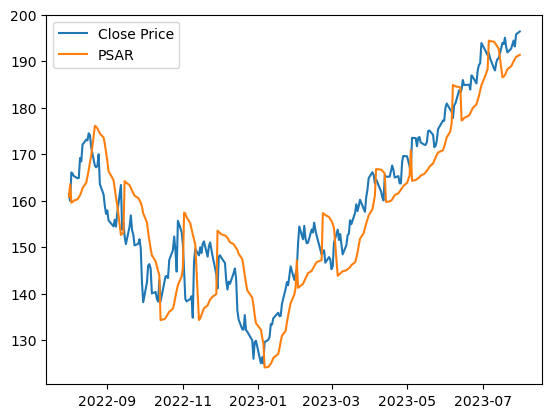

In [15]:
def calculate_psar(data,init_af, max_af,af_step):

    data['PSAR'] = 0.0 # parabolic SAR value 
    data['EP'] = 0.0 # extreme point value 
    data['AF'] = init_af # acceleration factor value 
    data['Trend'] = 0 # trend direction (1 for up, 0 for down)


    # Set the first PSAR value to the first low value
    data['PSAR'].iat[0] = data['Low'].iloc[0] 

    # Set the first EP value to the first high value
    data['EP'].iat[0]  = data['High'].iloc[0] 

    # Set the first trend direction to up
    data['Trend'].iat[0]  = 1

    # Loop through the rest of the data
    for i in range(1, data.shape[0]):

        # Get the previous and current values
        psar_ip = data['PSAR'].iat[i-1] 
        ep_ip = data['EP'].iat[i-1]
        af_ip = data['AF'].iat[i-1]
        trend_ip = data['Trend'].iat[i-1]
        high_i = data['High'].iat[i]
        low_i = data['Low'].iat[i]

        # Calculate the next PSAR value based on the trend direction and the formula
        if trend_ip == 1: # up trend
            next_psar = psar_ip + af_ip * (ep_ip - psar_ip)
        else: # down trend
            next_psar = psar_ip - af_ip * (psar_ip - ep_ip)

        # Reverse the trend direction if the next PSAR value is beyond the current high or low
        if trend_ip == 1 and next_psar > low_i: # up trend reversal
            next_trend = 0 # down trend
            next_psar = ep_ip # set PSAR to previous EP
            next_ep = low_i # set EP to current low
            next_af = init_af # reset AF to initial value
        elif trend_ip == 0 and next_psar < high_i: # down trend reversal
            next_trend = 1 # up trend
            next_psar = ep_ip # set PSAR to previous EP
            next_ep = high_i # set EP to current high
            next_af = init_af # reset AF to initial value
        else: # no trend reversal
            next_trend = trend_ip # keep the same trend direction

            # Update the EP and AF values based on the trend direction and the current high or low
            if next_trend == 1 and high_i > ep_ip: # new high in up trend
                next_ep = high_i # set EP to current high
                next_af = min(af_ip + af_step, max_af) # increase AF by step up to maximum value
            elif next_trend == 0 and low_i < ep_ip: # new low in down trend
                next_ep = low_i # set EP to current low
                next_af = min(af_ip + af_step, max_af) # increase AF by step up to maximum value
            else: # no new extreme point
                next_ep = ep_ip # keep the same EP value
                next_af = af_ip # keep the same AF value

        # Assign the next values to the data frame
        data['PSAR'].iat[i] = next_psar
        data['EP'].iat[i] = next_ep
        data['AF'].iat[i] = next_af
        data['Trend'].iat[i] = next_trend

    return data 

init_af = 0.02 # initial acceleration factor 
max_af = 0.2 # maximum acceleration factor 
af_step = 0.02 # acceleration factor step

stocks = calculate_psar(stocks, init_af, max_af, af_step)

fig,ax = plt.subplots(1,1)
ax.plot(stocks['Close'], label='Close Price') 
ax.plot(stocks['PSAR'], label='PSAR') 
ax.legend() 
plt.show()


### Verify PSAR using talib

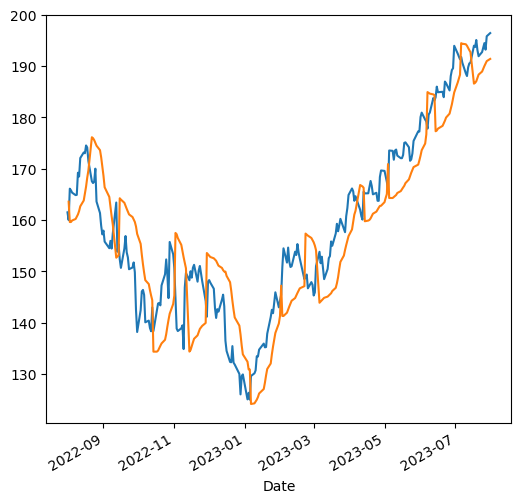

In [16]:
import talib 

stocks['SAR'] = talib.SAR(stocks['High'].values, stocks['Low'].values, 
acceleration=0.02, maximum=0.2)


fig,ax = plt.subplots(1,1,figsize=(6,6))

stocks['Close'].plot(ax=ax,label='Closing Price')
stocks['SAR'].plot(ax=ax,label= 'SAR')
plt.show()

## Fast and Slow Stochastic Oscillators

The difference considering the stochastic oscillators 
is that it can be divided into fast and slow, and that it is considered usu-
ally during a period of fourteen days. It is calculated using:

$K =
 100\frac{CP − Low_{14}}{High_{14} − Low_{14}}$

Here,

CP: Closing price

$LP_{14}$: Low price of the 14 previous trading sessions

$High_{14}$: High price of 14 previous trading sessions

The  interpretation  regarding  K(%)  is  that  if  the  result  is  80  then  the 
price  is  8%  above  the  prices  in  the  last  14 days.  The  days  can  change 
based on the intuition and knowledge of the trader and it is usual to see 
a five-day period.

The slow indicator creates a change by applying a three(3)-day mov-
ing average to fast calculation (%K). The result is that the slow stochastic 
oscillator (%D) creates a signal line that is useful to know when to buy 
and when to sell. 


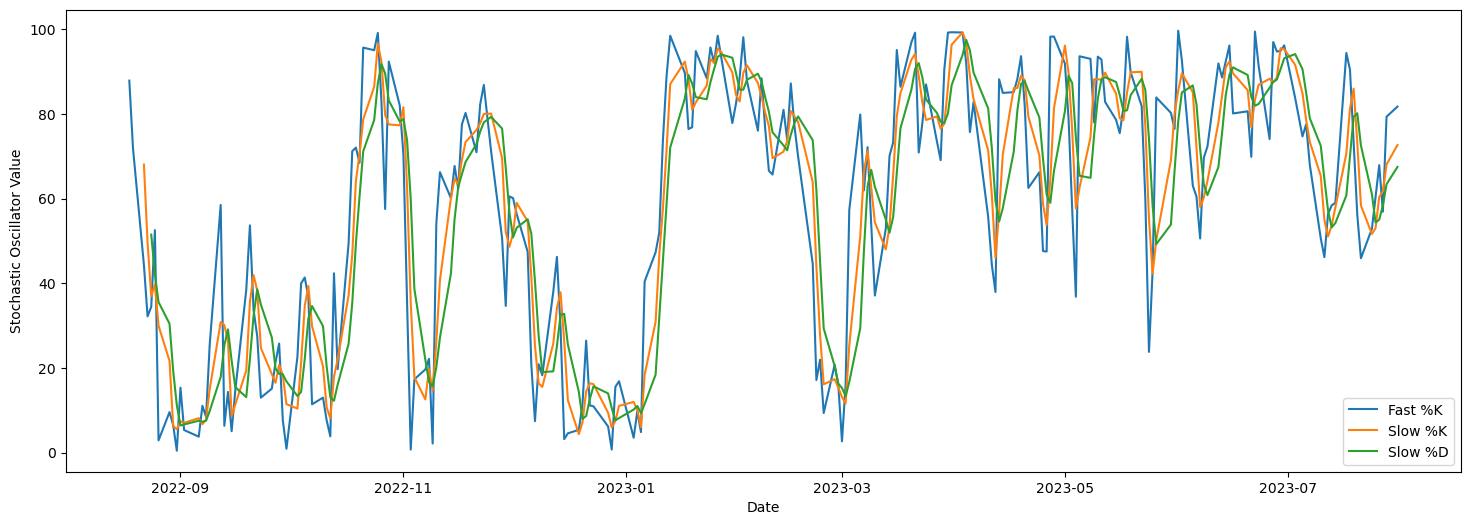

In [18]:
def calculate_stochastic_oscillator(data, fast_k, slow_k, slow_d):

    # Calculate Fast %K
    data['Fast %K'] = ((data['Close'] - data['Low'].rolling(fast_k).min()) / (data['High'].rolling(fast_k).max() - data['Low'].rolling(fast_k).min()
    )) * 100

    # Calculate Slow %K (Fast %K smoothed with Slow %K period)
    data['Slow %K'] = data['Fast %K'].rolling(slow_k).mean()

    # Calculate Slow %D (Slow %K smoothed with Slow %D period)
    data['Slow %D'] = data['Slow %K'].rolling(slow_d).mean()


    return data

# Define the parameters for the Stochastic Oscillators
fast_k = 14  # Fast %K period
slow_k = 3   # Slow %K period
slow_d = 3   # Slow %D period


stocks = calculate_stochastic_oscillator(stocks, fast_k, slow_k, slow_d)

fig,ax = plt.subplots(1,1,figsize=(18,6))

ax.plot(stocks.index, stocks['Fast %K'],label='Fast %K')
ax.plot(stocks.index, stocks['Slow %K'],label='Slow %K')
ax.plot(stocks.index, stocks['Slow %D'],label='Slow %D')

ax.set_ylabel('Stochastic Oscillator Value')
ax.set_xlabel('Date')
ax.legend()
plt.show()

### Check with tablib 

<Axes: xlabel='Date'>

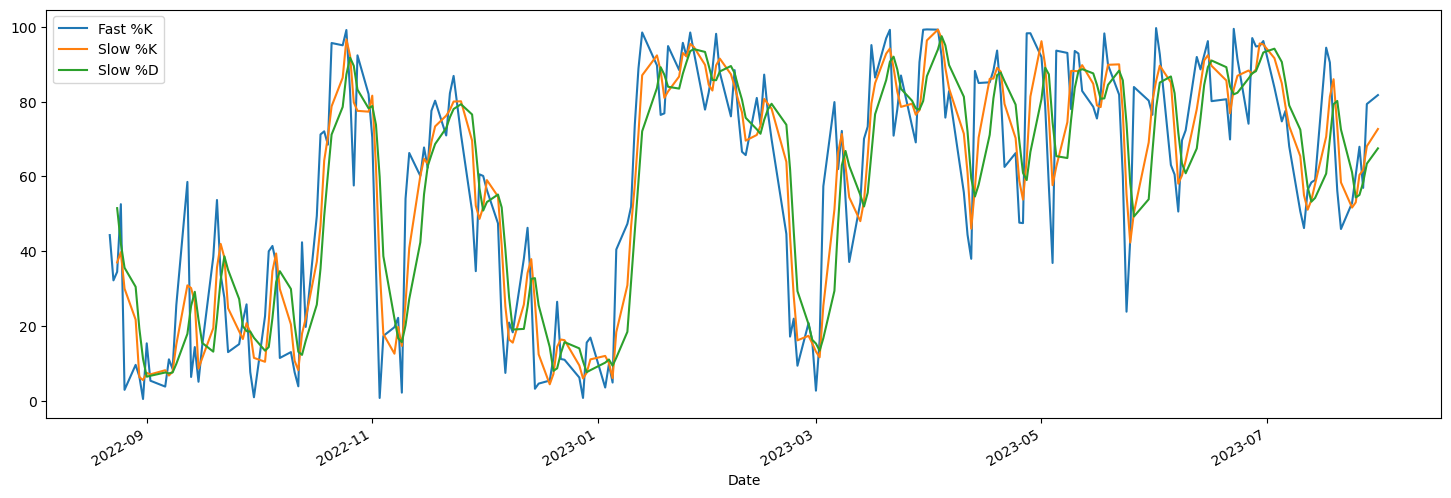

In [21]:
stocks['Fast %K'],stocks['Fast %D'] = talib.STOCHF(stocks['High'].values, 
stocks['Low'].values, stocks['Close'].values, fastk_period=14, fastd_period=3)

stocks['Slow %K'], stocks['Slow %D'] = talib.STOCH(stocks['High'].values, 
stocks['Low'].values,  stocks['Close'].values, fastk_period=14, 
slowk_period=3, slowd_period=3)

stocks[['Fast %K','Slow %K','Slow %D']].plot(figsize=(18,6))

## Kalman Filter

the Kalman filter is a probabilistic model of a sequence of observations
$z_1$, $z_2$, …, $z_T$ and a corresponding sequence of hidden states $x_1$, $x_2$, …, $x_T$.

To recover the hidden states from a sequence of observations that may become available in
real time, the algorithm iterates between two steps:
- Prediction step: Estimate the current state of the process.
- Measurement step: Use noisy observations to update its estimate by averaging the
information from both steps in a way that weighs more certain estimates higher.

To achieve its objective of recovering the hidden state, the Kalman filter makes the
following assumptions:
- The system that we are modeling behaves in a linear fashion.
- The hidden state process is a Markov chain so that the current hidden state $x_t$
depends only on the most recent prior hidden state $x_{t-1}$.
- Measurements are subject to Gaussian, uncorrelated noise with constant covariance.




[*********************100%%**********************]  1 of 1 completed

<Axes: title={'center': 'AAPL price'}, xlabel='Date', ylabel='Price'>

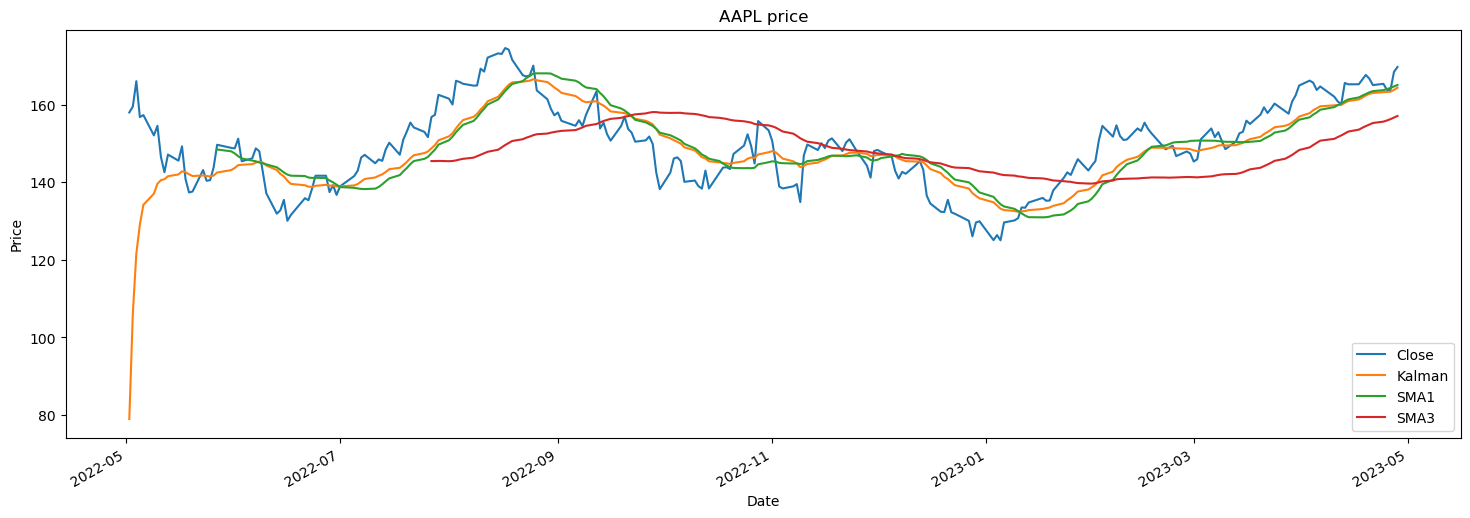

In [7]:
from pykalman import KalmanFilter
import pywt


import pandas_datareader.data as pdr

yfin.pdr_override()

# List of stock symbols
tech_stocks = 'AAPL'

# Set the date range for the historical data
start_date = '2022-05-01'
end_date = '2023-05-01'

# Download historical stock data for each stock

stocks = pdr.get_data_yahoo(tech_stocks, start_date, end_date)


# Get SMA 1 month and SMA 3 months
stocks['SMA1'] = stocks['Close'].rolling(window=20).mean()
stocks['SMA3'] = stocks['Close'].rolling(window=60).mean()

kf = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = 0,
                  initial_state_covariance = 1,
                  observation_covariance=1,
                  transition_covariance=.01)


state_means, _ = kf.filter(stocks['Close'])

stocks['Kalman'] = state_means

stocks[['Close','Kalman','SMA1','SMA3']].plot(figsize=(18,6),ylabel='Price',title=f"{tech_stocks} price")

We observe that Kalman fileter is able to reconstruct the stock price well after the initial burn and it performs similar to 1 month SMA but it more sensitive to price change.

## Wavelets 

Wavelets are related to Fourier analysis, which combines sine and cosine waves at different
frequencies to approximate noisy signals. While Fourier analysis is particularly useful to
translate signals from the time to the frequency domain, wavelets are useful for filtering
out specific patterns that may occur at different scales, which, in turn, may correspond to
a frequency range.

Wavelets are functions or wave-like patterns that decompose a discrete or continuous-
time signal into components of different scales. A wavelet transform, in turn, represents a
function using wavelets as scaled and translated copies of a finite-length waveform.


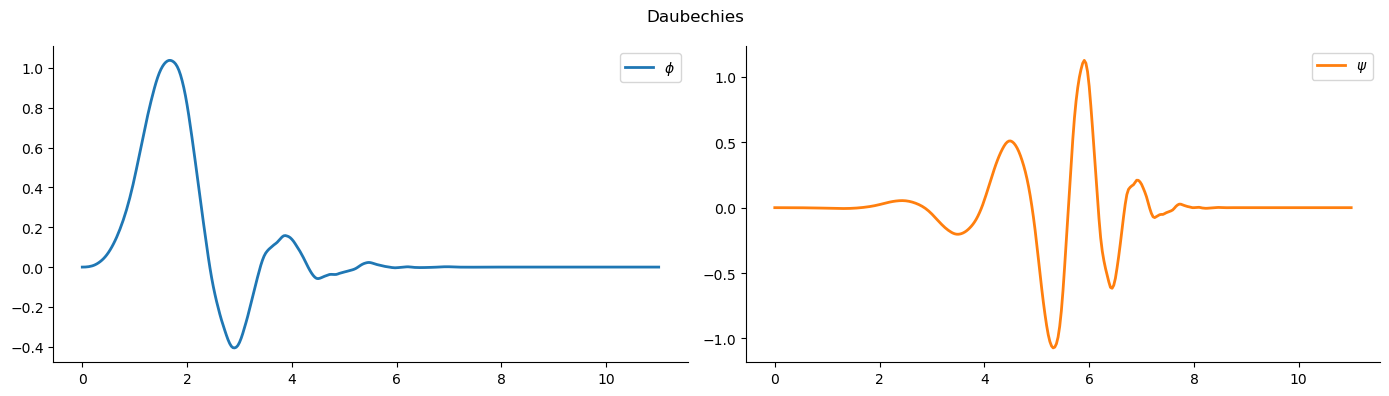

In [10]:
import pywt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# choose Daubechies 6 wavelet
wavelet = pywt.Wavelet('db6')

# get the scaling function and wavelet function
phi, psi, x = wavelet.wavefun(level=5)
df = pd.DataFrame({'$\phi$': phi, '$\psi$': psi}, index=x)
df.plot(title='Daubechies', subplots=True, layout=(1, 2), figsize=(14, 4), lw=2, rot=0)
plt.tight_layout()
sns.despine();


First we decompose the signal using the .wavedec function which retruns the coefficient of wavelet transform. Next we filter out all the coefficeints given a threshold and then take inverse transform.


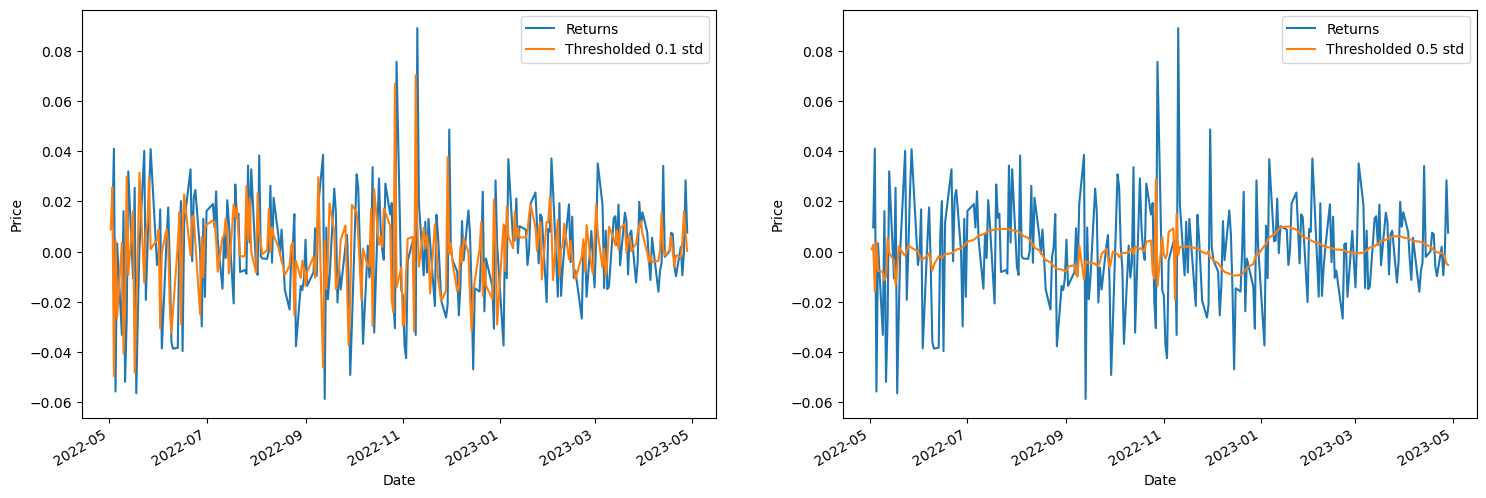

In [18]:
returns = stocks['Close'].pct_change().dropna()

fig,ax = plt.subplots(1,2,figsize=(18,6))

for i, scale in enumerate([0.1,0.5]):
    
    # coefficient of transform
    coeff = pywt.wavedec(returns, wavelet, mode='per')

    coeff[1:] = [pywt.threshold(i, value=scale*returns.max(), mode='soft') for i in coeff[1:]]

    new_signal = pywt.waverec(coeff, wavelet, mode='per')

    returns.plot(label='Returns', ax=ax[i])

    pd.Series(new_signal, index=stocks.index).plot(label=f'Thresholded {scale} std', ax=ax[i])

    ax[i].set_ylabel('Price')
    ax[i].legend()

We observe that the denoising using the pywavelet is able to denoise the returns well depending on the threshold scale.